# Meli-Data-Challenge-2021
Machine learning model to forecast item inventory days based on Mercado Libre historical data. 


### The challenge:

Every day, Mercadolibre's shipping unit (MercadoEnvíos) delivers thousands of products across Latin America.

In order to provide customers with the best experience throughout the shipping process, it is critical to have accurate sales forecasts.

At the core of this business problem, lies the Data Challenge task: given the historical sales time-series for a subset of the martketplace's listings, we challenge you to predict how long will it take for a given item to run out of stock.

##### Challenge link: [ml-challenge](https://ml-challenge.mercadolibre.com/)

---

### This challenge will be the submission of Joaquin Bembhy

In [2]:
#Start by importing the important libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq

#parquet_file = pq.ParquetFile('data.parquet')

In [13]:
#Upload training, test and metadata
training = pd.read_parquet('../input/meli-dataset/train_data.parquet')
test = pd.read_csv('../input/meli-dataset/test_data.csv')

In [15]:
training.head(10)

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
0,464801,2021-02-01,0,156.78,REA,classic,fulfillment,free_shipping,1440.0
1,464801,2021-02-02,0,156.78,REA,classic,fulfillment,free_shipping,1440.0
2,464801,2021-02-03,0,156.78,REA,classic,fulfillment,free_shipping,1440.0
3,464801,2021-02-04,0,156.78,REA,classic,fulfillment,free_shipping,1440.0
4,464801,2021-02-05,1,156.78,REA,classic,fulfillment,free_shipping,1440.0
5,464801,2021-02-06,0,157.78,REA,classic,fulfillment,free_shipping,1440.0
6,464801,2021-02-07,0,156.98,REA,classic,fulfillment,free_shipping,1440.0
7,464801,2021-02-08,0,164.99,REA,classic,fulfillment,free_shipping,1440.0
8,464801,2021-02-09,1,164.99,REA,classic,fulfillment,free_shipping,1440.0
9,464801,2021-02-10,1,164.99,REA,classic,fulfillment,free_shipping,1440.0


In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37660279 entries, 0 to 37660278
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   sku                     int64  
 1   date                    object 
 2   sold_quantity           int64  
 3   current_price           float64
 4   currency                object 
 5   listing_type            object 
 6   shipping_logistic_type  object 
 7   shipping_payment        object 
 8   minutes_active          float64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.5+ GB


In [22]:
#transform date column to date type

training['date'] = pd.to_datetime(training['date'], format = '%Y/%m/%d')

Timestamp('2021-03-31 00:00:00')

### 2. Data exploration

In [11]:
test.head()

,sku,target_stock
0,464801,3
1,645793,4
2,99516,8
3,538100,8
4,557191,10


In [27]:
#Explore dates

print('Dates range from', training['date'].min(), 'to', training['date'].max())
print('The data corresponds to 2 entire months')

Dates range from 2021-02-01 00:00:00 to 2021-03-31 00:00:00
The data corresponds to 2 entire months


In [9]:
# Now we are going to save to a variable all the dates and eliminate duplicates

#dates = training[['date']]
#dates = dates.drop_duplicates()

#Now we have all the dates as a variable
#I'm going to try and 

sales_per_day = training.resample('D', on='date')['sold_quantity'].sum()
sales_per_week = training.resample('W', on='date')['sold_quantity'].sum()
sales_per_month = training.resample('M', on='date')['sold_quantity'].sum()

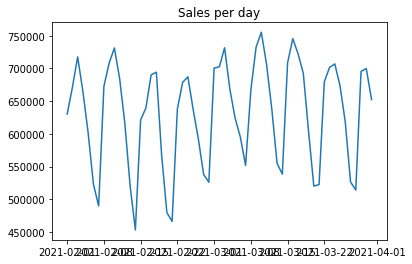

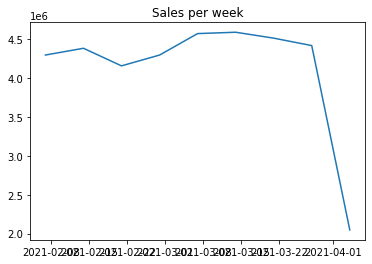

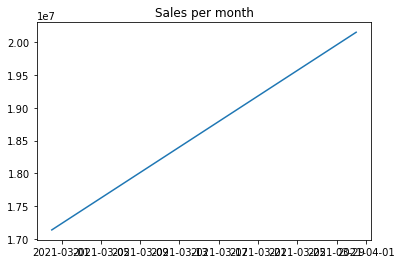

In [29]:
#compare it to the amount of value counts

plt.plot(sales_per_day)
plt.title('Sales per day')
plt.show()
plt.plot(sales_per_week)
plt.title('Sales per week')
plt.show()
plt.plot(sales_per_month)
plt.title('Sales per month')
plt.show()